In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/liver/TPRP_target.xlsx') # HEK 데이터임 liver라고 잘못씀 더이상 존재하지 않는 주소임
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.336,0.0113,[2],0,0.330,101,0.101,...,-1,0,0,(),Normal,Unk,Unk,0,314344776,NaN
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,LAAFGQLHK/3,0.196,0.0110,[2],0,-0.002,55,0.074,...,-1,0,0,(),Normal,Unk,Unk,0,267336552,NaN
2,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,RRPENPKPQDGK/4,0.470,0.3030,[2],0,-0.001,8,0.151,...,-1,0,0,(),Normal,Unk,Unk,0,413104802,NaN
3,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.600,0.3030,[2],0,-0.002,110,0.107,...,-1,0,0,(),Normal,Unk,Unk,0,413103341,NaN
4,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.601,0.2650,[2],0,-0.003,35,0.081,...,-1,0,0,(),Normal,Unk,Unk,0,190440295,NaN


In [3]:
NNd1 = pd.read_excel('./target_decoy/liver/TPRP_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,HSGPFQR/2,0.231,0.033,[2],0,0.004,49,0.065,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15006|EMC2_HUMAN(pre=R,post=V)",864265771
1,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PWDDLDLSR/2,0.184,0.007,[2],0,0.495,60,0.061,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q99490|AGAP2_HUMAN(pre=R,post=E)",911497606
2,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PERGTSLAHLEMR/4,0.381,0.139,[2],0,0.003,18,0.118,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P40306|PSB10_HUMAN(pre=K,post=V)",823211066
3,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,EERLNETDIHLK/3,0.277,0.063,[2],0,0.001,113,0.079,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q14BN4|SLMAP_HUMAN(pre=R,post=D)",788707173
4,b1906_293T_proteinID_01A_QE3_122212.01934.01934.3,1,KHSEEHSE/3,0.168,0.065,[2],0,0.327,4,0.079,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P05109|S10A8_HUMAN(pre=K,post=-)",906541750


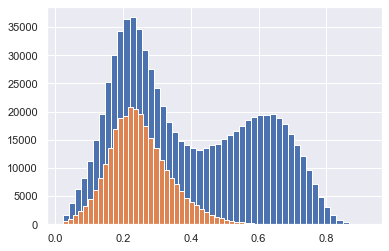

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.01798
0.01492


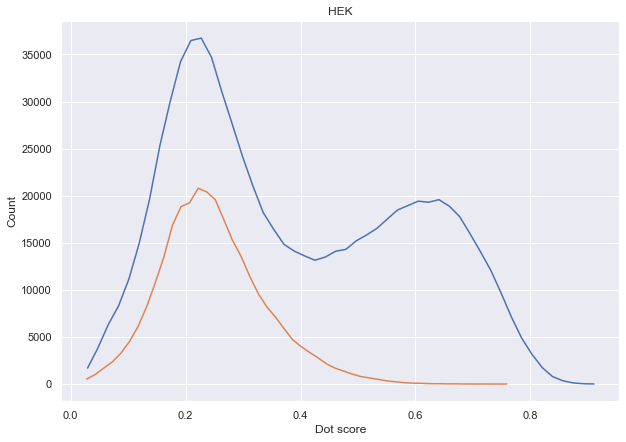

In [9]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('HEK')
plt.plot(nnt1[1][:-1] + 0.0085, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.007, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

766910
280174


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.5050000000000003
nnt:  253235
nnd:  2519
FDR:  0.009947282168736549
"""

score:  0.001
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.002
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.003
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.004
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.005
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.006
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.007
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.008
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.009000000000000001
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.010000000000000002
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.011000000000000003
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.012000000000000004
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.013000000000000005
nnt:  766910
nnd:  280174
FDR:  0.36532839577003823


score:  0.014000000000000005
nnt:  766910

nnt:  740365
nnd:  269077
FDR:  0.3634383040797444


score:  0.10400000000000008
nnt:  739697
nnd:  268768
FDR:  0.3633487765936593


score:  0.10500000000000008
nnt:  739034
nnd:  268463
FDR:  0.3632620420711361


score:  0.10600000000000008
nnt:  738372
nnd:  268159
FDR:  0.3631760142583955


score:  0.10700000000000008
nnt:  737697
nnd:  267818
FDR:  0.36304607447231046


score:  0.10800000000000008
nnt:  737072
nnd:  267488
FDR:  0.3629062018364556


score:  0.10900000000000008
nnt:  736337
nnd:  267140
FDR:  0.362795839405055


score:  0.11000000000000008
nnt:  735657
nnd:  266760
FDR:  0.3626146424216721


score:  0.11100000000000008
nnt:  734904
nnd:  266376
FDR:  0.36246366872407826


score:  0.11200000000000009
nnt:  734133
nnd:  266025
FDR:  0.3623662197449236


score:  0.11300000000000009
nnt:  733356
nnd:  265681
FDR:  0.3622810749485925


score:  0.11400000000000009
nnt:  732593
nnd:  265280
FDR:  0.3621110220818381


score:  0.11500000000000009
nnt:  731809
nnd:  264909
F

nnt:  599403
nnd:  184299
FDR:  0.30747093357891103


score:  0.20700000000000016
nnt:  597458
nnd:  182908
FDR:  0.306143695456417


score:  0.20800000000000016
nnt:  595383
nnd:  181547
FDR:  0.3049247291239421


score:  0.20900000000000016
nnt:  593427
nnd:  180189
FDR:  0.3036413914432609


score:  0.21000000000000016
nnt:  591351
nnd:  178820
FDR:  0.3023923186060394


score:  0.21100000000000016
nnt:  589337
nnd:  177376
FDR:  0.3009755029804679


score:  0.21200000000000016
nnt:  587325
nnd:  176012
FDR:  0.29968416123951813


score:  0.21300000000000016
nnt:  585318
nnd:  174586
FDR:  0.2982754673527894


score:  0.21400000000000016
nnt:  583240
nnd:  173226
FDR:  0.2970063781633633


score:  0.21500000000000016
nnt:  581260
nnd:  171852
FDR:  0.2956542683136634


score:  0.21600000000000016
nnt:  579187
nnd:  170459
FDR:  0.29430736532415264


score:  0.21700000000000016
nnt:  577101
nnd:  169096
FDR:  0.2930093692438585


score:  0.21800000000000017
nnt:  575013
nnd:  167719


nnt:  420820
nnd:  62930
FDR:  0.1495413716078133


score:  0.3090000000000002
nnt:  419566
nnd:  62118
FDR:  0.1480529880876906


score:  0.3100000000000002
nnt:  418335
nnd:  61353
FDR:  0.14665997346624118


score:  0.3110000000000002
nnt:  417058
nnd:  60587
FDR:  0.14527236019930082


score:  0.3120000000000002
nnt:  415831
nnd:  59822
FDR:  0.14386132827999837


score:  0.3130000000000002
nnt:  414641
nnd:  59120
FDR:  0.14258117262885242


score:  0.3140000000000002
nnt:  413411
nnd:  58365
FDR:  0.14117911714976136


score:  0.3150000000000002
nnt:  412220
nnd:  57634
FDR:  0.13981369171801467


score:  0.3160000000000002
nnt:  411011
nnd:  56908
FDR:  0.1384585814004978


score:  0.3170000000000002
nnt:  409828
nnd:  56172
FDR:  0.13706237738758698


score:  0.3180000000000002
nnt:  408645
nnd:  55474
FDR:  0.13575107978808013


score:  0.31900000000000023
nnt:  407548
nnd:  54748
FDR:  0.13433509672480295


score:  0.32000000000000023
nnt:  406429
nnd:  54073
FDR:  0.13304414

nnt:  327092
nnd:  14742
FDR:  0.045069888594034706


score:  0.4110000000000003
nnt:  326355
nnd:  14511
FDR:  0.044463850714712504


score:  0.4120000000000003
nnt:  325605
nnd:  14299
FDR:  0.043915173292793416


score:  0.4130000000000003
nnt:  324864
nnd:  14057
FDR:  0.043270414696611505


score:  0.4140000000000003
nnt:  324110
nnd:  13831
FDR:  0.04267378359199037


score:  0.4150000000000003
nnt:  323358
nnd:  13597
FDR:  0.04204936942954867


score:  0.4160000000000003
nnt:  322585
nnd:  13383
FDR:  0.04148673992901096


score:  0.4170000000000003
nnt:  321895
nnd:  13155
FDR:  0.04086736358129204


score:  0.4180000000000003
nnt:  321142
nnd:  12900
FDR:  0.04016914635893156


score:  0.4190000000000003
nnt:  320399
nnd:  12703
FDR:  0.039647439598750306


score:  0.4200000000000003
nnt:  319636
nnd:  12482
FDR:  0.039050670137281154


score:  0.4210000000000003
nnt:  318940
nnd:  12275
FDR:  0.038486862732802406


score:  0.4220000000000003
nnt:  318242
nnd:  12066
FDR:  0.

'\n결과\nscore:  0.45200000000000035\nnnt:  96863\nnnd:  961\nFDR:  0.009921228952231503\n'

In [10]:
NNt2 = pd.read_excel('./target_decoy/liver/TPRP_target.xlsx')
NNt2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00135.00135.3,1,GSFMLGLETHDRK/3,0.257,0.0726,[2],0,0.324,104,0.0707,...,-1,0,0,(),Normal,Unk,Unk,0,177998491,NaN
1,Adult_Liver_bRP_Elite_82_f01.00146.00146.2,1,ELGLGLGLGLK/2,0.171,0.0020,[2],0,0.506,32,0.0790,...,-1,0,0,(),Normal,Unk,Unk,0,108703929,NaN
2,Adult_Liver_bRP_Elite_82_f01.00156.00156.2,1,PLSDFILALK/2,0.158,0.0200,[2],0,0.003,49,0.0680,...,-1,0,0,(),Normal,Unk,Unk,0,369120829,NaN
3,Adult_Liver_bRP_Elite_82_f01.00178.00178.3,1,SWHDM[147]QTTTAYK/3,0.147,0.0360,[2],0,0.336,31,0.0650,...,-1,0,0,(),Normal,Unk,Unk,0,457054777,NaN
4,Adult_Liver_bRP_Elite_82_f01.00181.00181.2,1,ILQLLHPHVK/2,0.040,0.0240,[2],0,0.503,2,0.0320,...,-1,0,0,(),Normal,Unk,Unk,0,219368035,NaN


In [11]:
NNd2 = pd.read_excel('./target_decoy/liver/TPRP_decoy.xlsx')
NNd2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00157.00157.2,1,EELEKHQAELNK/2,0.206,0.008,[2],0,0.494,115,0.065,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q16181|SEPT7_HUMAN(pre=K,post=R)",839877962
1,Adult_Liver_bRP_Elite_82_f01.00171.00171.2,1,EFVSEQAQALMMK/2,0.185,0.002,[2],0,-0.005,78,0.057,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IUC4|RHPN2_HUMAN(pre=K,post=I)",827322609
2,Adult_Liver_bRP_Elite_82_f01.00177.00177.2,1,FVTSFVVTVK/2,0.178,0.028,[2],0,0.001,63,0.067,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O15144|ARPC2_HUMAN(pre=R,post=D)",988763012
3,Adult_Liver_bRP_Elite_82_f01.00311.00311.2,1,EASVVLILVK/2,0.155,0.025,[2],0,-0.005,34,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P53602|MVD1_HUMAN(pre=R,post=K)",975636781
4,Adult_Liver_bRP_Elite_82_f01.00334.00334.2,1,LAAVQLLITTK/2,0.131,0.002,[2],0,0.004,7,0.068,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q92608|DOCK2_HUMAN(pre=K,post=Y)",954897098


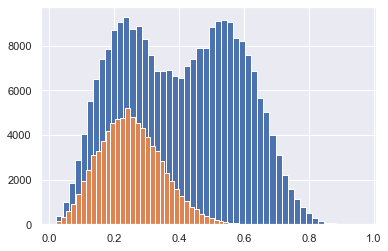

In [12]:
nnt2 = plt.hist(NNt2['Dot'], bins = 50)
nnd2 = plt.hist(NNd2['Dot'], bins = 50)

0.01876
0.01514


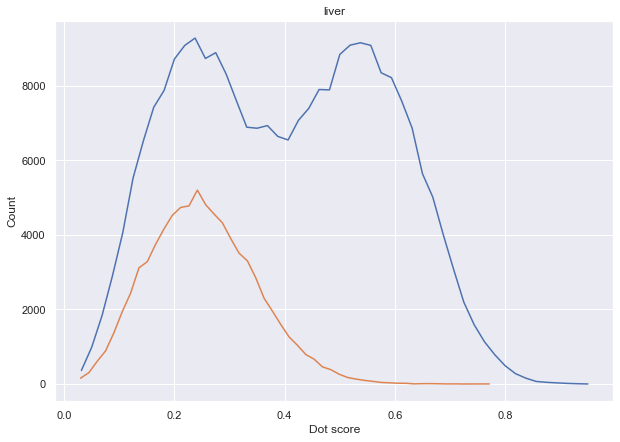

In [22]:
print(nnt2[1][1] - nnt2[1][0])
print(nnd2[1][1] - nnd2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('liver')
plt.plot(nnt2[1][:-1] + 0.009, nnt2[0])
plt.plot(nnd2[1][:-1] + 0.0075, nnd2[0])
plt.show()

In [14]:
print(len(NNt2))
print(len(NNd2))

254038
79902


In [15]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt2['Dot'] >= score
    nnt = NNt2[nntarget]
    
    nndecoy = NNd2['Dot'] >= score
    nnd = NNd2[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.4900000000000004
nnt:  91766
nnd:  917
FDR:  0.009992807793736243
"""

score:  0.001
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.002
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.003
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.004
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.005
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.006
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.007
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.008
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.009000000000000001
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.010000000000000002
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.011000000000000003
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.012000000000000004
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.013000000000000005
nnt:  254038
nnd:  79902
FDR:  0.3145277478172557


score:  0.014000000000000005
nnt:  254038
nnd:  79902
FDR:  0.31452

nnt:  246104
nnd:  75460
FDR:  0.30661834021389334


score:  0.10700000000000008
nnt:  245869
nnd:  75326
FDR:  0.30636639836660984


score:  0.10800000000000008
nnt:  245646
nnd:  75181
FDR:  0.3060542406552519


score:  0.10900000000000008
nnt:  245413
nnd:  75046
FDR:  0.30579472155101806


score:  0.11000000000000008
nnt:  245186
nnd:  74915
FDR:  0.3055435465320206


score:  0.11100000000000008
nnt:  244942
nnd:  74762
FDR:  0.3052232773472904


score:  0.11200000000000009
nnt:  244693
nnd:  74623
FDR:  0.30496581430608966


score:  0.11300000000000009
nnt:  244416
nnd:  74478
FDR:  0.30471818538884526


score:  0.11400000000000009
nnt:  244163
nnd:  74338
FDR:  0.3044605447999902


score:  0.11500000000000009
nnt:  243897
nnd:  74185
FDR:  0.30416528288580835


score:  0.11600000000000009
nnt:  243641
nnd:  74054
FDR:  0.303947201004757


score:  0.11700000000000009
nnt:  243393
nnd:  73905
FDR:  0.3036447227323711


score:  0.11800000000000009
nnt:  243110
nnd:  73749
FDR:  0.30

nnt:  207822
nnd:  51421
FDR:  0.24742808749795497


score:  0.21000000000000016
nnt:  207347
nnd:  51117
FDR:  0.24652876578875027


score:  0.21100000000000016
nnt:  206855
nnd:  50769
FDR:  0.245432791085543


score:  0.21200000000000016
nnt:  206392
nnd:  50467
FDR:  0.24452013643939688


score:  0.21300000000000016
nnt:  205910
nnd:  50157
FDR:  0.2435870040308873


score:  0.21400000000000016
nnt:  205441
nnd:  49871
FDR:  0.24275096012967226


score:  0.21500000000000016
nnt:  204961
nnd:  49547
FDR:  0.24173867223520573


score:  0.21600000000000016
nnt:  204464
nnd:  49255
FDR:  0.24089815322012678


score:  0.21700000000000016
nnt:  203983
nnd:  48936
FDR:  0.2399023448032434


score:  0.21800000000000017
nnt:  203485
nnd:  48612
FDR:  0.2388972160110082


score:  0.21900000000000017
nnt:  203057
nnd:  48290
FDR:  0.23781499775924986


score:  0.22000000000000017
nnt:  202573
nnd:  48006
FDR:  0.23698123639379384


score:  0.22100000000000017
nnt:  202093
nnd:  47699
FDR:  0.

nnt:  158647
nnd:  19642
FDR:  0.12380946377807334


score:  0.3160000000000002
nnt:  158279
nnd:  19414
FDR:  0.12265682750080555


score:  0.3170000000000002
nnt:  157881
nnd:  19170
FDR:  0.12142056358903225


score:  0.3180000000000002
nnt:  157490
nnd:  18919
FDR:  0.12012826211188012


score:  0.31900000000000023
nnt:  157081
nnd:  18675
FDR:  0.11888770761581605


score:  0.32000000000000023
nnt:  156680
nnd:  18424
FDR:  0.11758999234107735


score:  0.32100000000000023
nnt:  156305
nnd:  18187
FDR:  0.11635584274335434


score:  0.32200000000000023
nnt:  155911
nnd:  17940
FDR:  0.11506564642648691


score:  0.32300000000000023
nnt:  155490
nnd:  17721
FDR:  0.11396874397067336


score:  0.32400000000000023
nnt:  155119
nnd:  17515
FDR:  0.11291331171552163


score:  0.32500000000000023
nnt:  154749
nnd:  17284
FDR:  0.11169054404228783


score:  0.32600000000000023
nnt:  154349
nnd:  17033
FDR:  0.11035380857666717


score:  0.32700000000000023
nnt:  153956
nnd:  16788
FDR:  

nnd:  3865
FDR:  0.03215393958553447


score:  0.4210000000000003
nnt:  119856
nnd:  3786
FDR:  0.0315879054865839


score:  0.4220000000000003
nnt:  119467
nnd:  3715
FDR:  0.031096453413913466


score:  0.4230000000000003
nnt:  119109
nnd:  3640
FDR:  0.030560243138637717


score:  0.4240000000000003
nnt:  118722
nnd:  3583
FDR:  0.030179747645760684


score:  0.4250000000000003
nnt:  118353
nnd:  3514
FDR:  0.029690840113896565


score:  0.4260000000000003
nnt:  117984
nnd:  3433
FDR:  0.02909716571738541


score:  0.4270000000000003
nnt:  117629
nnd:  3371
FDR:  0.02865789898749458


score:  0.4280000000000003
nnt:  117255
nnd:  3321
FDR:  0.028322886017653832


score:  0.4290000000000003
nnt:  116862
nnd:  3263
FDR:  0.027921822320343653


score:  0.4300000000000003
nnt:  116492
nnd:  3198
FDR:  0.02745252892902517


score:  0.4310000000000003
nnt:  116092
nnd:  3136
FDR:  0.02701305860868966


score:  0.43200000000000033
nnt:  115705
nnd:  3082
FDR:  0.026636705414632037


score:

'\n결과\nscore:  0.48100000000000037\nnnt:  200684\nnnd:  1995\nFDR:  0.009941001773933148\n'

In [16]:
NNt3_1 = pd.read_excel('./target_decoy/lung/TPRP_1_target.xlsx')
NNt3_1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00056.00056.2,1,VQC[160]SPDVGLTC[160]R/2,0.185,0.043,[2],0,0.500,62,0.053,...,-1,0,0,(),Normal,Unk,Unk,0,519799754,NaN
1,01088_A01_P010740_S00_N01_R1.00107.00107.2,1,YLHPPTHLK/2,0.395,0.127,[2],0,-0.007,107,0.073,...,-1,0,0,(),Normal,Unk,Unk,0,547118082,NaN
2,01088_A01_P010740_S00_N01_R1.00140.00140.2,1,VQLLSQYDNEK/2,0.155,0.012,[2],0,0.008,111,0.057,...,-1,0,0,(),Normal,Unk,Unk,0,520570980,NaN
3,01088_A01_P010740_S00_N01_R1.00177.00177.2,1,AELPPTGTSNATR/2,0.280,0.070,[2],0,0.002,85,0.070,...,-1,0,0,(),Normal,Unk,Unk,0,8914836,NaN
4,01088_A01_P010740_S00_N01_R1.00178.00178.2,1,VQC[160]SPDVGLTC[160]R/2,0.161,0.009,[2],0,0.496,63,0.054,...,-1,0,0,(),Normal,Unk,Unk,0,519799754,NaN


In [17]:
NNt3_2 = pd.read_excel('./target_decoy/lung/TPRP_2_target.xlsx')
NNt3_2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_F01_P010740_S00_N06_R1.04701.04701.2,1,GIGDPVTC[160]LK/2,0.398,0.044,[2],0,-0.007,177,0.094,...,-1,0,0,(),Normal,Unk,Unk,0,163896580,NaN
1,01088_F01_P010740_S00_N06_R1.04708.04708.3,1,KSPESVALIWERDEPGTEVR/3,0.259,0.001,[2],0,-0.009,51,0.060,...,-1,0,0,(),Normal,Unk,Unk,0,261140428,NaN
2,01088_F01_P010740_S00_N06_R1.04709.04709.3,1,LKHEDTNLASSTIVK/3,0.336,0.123,[2],0,0.326,95,0.079,...,-1,0,0,(),Normal,Unk,Unk,0,290180599,NaN
3,01088_F01_P010740_S00_N06_R1.04711.04711.3,1,ALTHIDHSLSR/3,0.284,0.048,[2],0,0.006,86,0.085,...,-1,0,0,(),Normal,Unk,Unk,0,25584191,NaN
4,01088_F01_P010740_S00_N06_R1.04713.04713.2,1,YIPIC[160]PVFK/2,0.421,0.164,[2],0,0.492,129,0.067,...,-1,0,0,(),Normal,Unk,Unk,0,545185929,NaN


In [18]:
NNt3_3 = pd.read_excel('./target_decoy/lung/TPRP_3_target.xlsx')
NNt3_3.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01279_C03_P013163_B00_N19_R1.32592.32592.3,1,EAQSSQATPVQTSQPDSSNIVK/3,0.169,0.002,[2],0,-0.007,41,0.061,...,-1,0,0,(),Normal,Unk,Unk,0,88959293,NaN
1,01279_C03_P013163_B00_N19_R1.32593.32593.2,1,DEWLRPEDLPIK/2,0.793,0.460,[2],0,0.001,98,0.080,...,-1,0,0,(),Normal,Unk,Unk,0,59835837,NaN
2,01279_C03_P013163_B00_N19_R1.32594.32594.2,1,VDANEEVEALIVK/2,0.673,0.361,[2],0,0.002,107,0.092,...,-1,0,0,(),Normal,Unk,Unk,0,496008612,NaN
3,01279_C03_P013163_B00_N19_R1.32596.32596.2,1,EHGTDFFDKDGVMK/2,0.206,0.099,[2],0,0.497,27,0.048,...,-1,0,0,(),Normal,Unk,Unk,0,100949640,NaN
4,01279_C03_P013163_B00_N19_R1.32597.32597.3,1,LDPHLVLDQLR/3,0.649,0.366,[2],0,0.000,59,0.083,...,-1,0,0,(),Normal,Unk,Unk,0,274106008,NaN


In [19]:
NNd3_1 = pd.read_excel('./target_decoy/lung/TPRP_1_decoy.xlsx')
NNd3_1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00011.00011.2,1,LISITSINDSK/2,0.173,0.0404,[2],0,0.0051,50,0.0498,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IWZ6|BBS7_HUMAN(pre=K,post=D)",899514708
1,01088_A01_P010740_S00_N01_R1.00038.00038.2,1,VAPTVSVVAPAPK/2,0.113,0.0060,[2],0,0.4960,18,0.0530,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q96CB8|INT12_HUMAN(pre=K,post=D)",851621663
2,01088_A01_P010740_S00_N01_R1.00092.00092.2,1,QNGWPDAEVDQR/2,0.159,0.0050,[2],0,0.5050,48,0.0660,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y4U1|MMAC_HUMAN(pre=R,post=I)",862052386
3,01088_A01_P010740_S00_N01_R1.00106.00106.2,1,GPIPLLSGKIK/2,0.118,0.0120,[2],0,0.0070,3,0.0970,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y548|YIPF1_HUMAN(pre=R,post=N)",732392683
4,01088_A01_P010740_S00_N01_R1.00111.00111.2,1,TQLDNPALFPK/2,0.160,0.0060,[2],0,0.5060,115,0.0600,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WXF7|ATLA1_HUMAN(pre=K,post=H)",852611134


In [20]:
NNd3_2 = pd.read_excel('./target_decoy/lung/TPRP_2_decoy.xlsx')
NNd3_2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_F01_P010740_S00_N06_R1.04703.04703.2,1,SFATAFAEK/2,0.360,0.088,[2],0,-0.001,124,0.079,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O96006|ZBED1_HUMAN(pre=R,post=L)",621853729
1,01088_F01_P010740_S00_N06_R1.04705.04705.3,1,ERHNENLLSFLPGLK/3,0.268,0.081,[2],0,0.340,41,0.065,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q16401|PSMD5_HUMAN(pre=R,post=T)",787054643
2,01088_F01_P010740_S00_N06_R1.04707.04707.2,1,LWLEALQNAPIK/2,0.176,0.019,[2],0,0.502,42,0.065,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9NZM1|MYOF_HUMAN(pre=K,post=L)",737226573
3,01088_F01_P010740_S00_N06_R1.04712.04712.2,1,LLHTWNEK/2,0.223,0.014,[2],0,0.506,103,0.075,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q6P179|ERAP2_HUMAN(pre=R,post=K)",646378227
4,01088_F01_P010740_S00_N06_R1.04717.04717.3,1,ALGPLAPRQQVLR/3,0.356,0.183,[2],0,0.336,11,0.104,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q7Z4Q2|HEAT3_HUMAN(pre=R,post=R)",818603221


In [21]:
NNd3_3 = pd.read_excel('./target_decoy/lung/TPRP_3_decoy.xlsx')
NNd3_3.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01279_C03_P013163_B00_N19_R1.32595.32595.3,1,NSEIFEEDDKNVK/3,0.362,0.053,[2],0,0.336,55,0.092,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P00450|CERU_HUMAN(pre=K,post=M)",979318683
1,01279_C03_P013163_B00_N19_R1.32599.32599.2,1,NVKDTADENDPDASMGLK/2,0.150,0.000,[2],0,-0.008,31,0.047,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O75152|ZC11A_HUMAN(pre=R,post=V)",786824251
2,01279_C03_P013163_B00_N19_R1.32601.32601.2,1,LPHPMSALSSGEEYVSTEESR/2,0.091,0.022,[2],0,0.001,14,0.044,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9ULL8|SHRM4_HUMAN(pre=K,post=S)",900803589
3,01279_C03_P013163_B00_N19_R1.32602.32602.2,1,LIGGIGGFGR/2,0.272,0.028,[2],0,0.007,58,0.105,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P62495|ERF1_HUMAN(pre=K,post=Y)",683304733
4,01279_C03_P013163_B00_N19_R1.32607.32607.2,1,QNEKEFESK/2,0.260,0.008,[2],0,0.008,152,0.063,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15075|EEA1_HUMAN(pre=K,post=G)",900842051


In [23]:
NNt3 = list(NNt3_1['Dot']) + list(NNt3_2['Dot']) + list(NNt3_3['Dot'])
NNt3

[0.185,
 0.395,
 0.155,
 0.28,
 0.161,
 0.227,
 0.185,
 0.068,
 0.091,
 0.107,
 0.122,
 0.13,
 0.206,
 0.071,
 0.116,
 0.223,
 0.154,
 0.196,
 0.229,
 0.211,
 0.101,
 0.174,
 0.175,
 0.157,
 0.238,
 0.179,
 0.185,
 0.028,
 0.174,
 0.165,
 0.19,
 0.223,
 0.166,
 0.134,
 0.119,
 0.206,
 0.166,
 0.171,
 0.24,
 0.19,
 0.113,
 0.145,
 0.232,
 0.219,
 0.205,
 0.058,
 0.16,
 0.144,
 0.27,
 0.143,
 0.17,
 0.073,
 0.124,
 0.204,
 0.2,
 0.121,
 0.205,
 0.22,
 0.189,
 0.195,
 0.089,
 0.168,
 0.155,
 0.162,
 0.146,
 0.394,
 0.17,
 0.315,
 0.228,
 0.365,
 0.185,
 0.223,
 0.245,
 0.263,
 0.169,
 0.212,
 0.152,
 0.202,
 0.298,
 0.206,
 0.193,
 0.17,
 0.161,
 0.157,
 0.157,
 0.187,
 0.235,
 0.155,
 0.201,
 0.173,
 0.206,
 0.203,
 0.194,
 0.238,
 0.15,
 0.222,
 0.247,
 0.166,
 0.141,
 0.253,
 0.133,
 0.118,
 0.263,
 0.252,
 0.24,
 0.1,
 0.177,
 0.123,
 0.214,
 0.184,
 0.141,
 0.058,
 0.105,
 0.118,
 0.165,
 0.21,
 0.15,
 0.241,
 0.188,
 0.134,
 0.157,
 0.219,
 0.109,
 0.189,
 0.142,
 0.244,
 0.217,
 0.

In [24]:
NNd3 = list(NNd3_1['Dot']) + list(NNd3_2['Dot']) + list(NNd3_3['Dot'])
NNd3

[0.173,
 0.113,
 0.159,
 0.118,
 0.16,
 0.22,
 0.321,
 0.302,
 0.145,
 0.218,
 0.161,
 0.315,
 0.274,
 0.127,
 0.322,
 0.31,
 0.279,
 0.175,
 0.144,
 0.273,
 0.047,
 0.272,
 0.123,
 0.094,
 0.281,
 0.187,
 0.28,
 0.477,
 0.053,
 0.223,
 0.142,
 0.119,
 0.295,
 0.16,
 0.187,
 0.06,
 0.175,
 0.251,
 0.078,
 0.07,
 0.261,
 0.223,
 0.293,
 0.229,
 0.129,
 0.056,
 0.17,
 0.299,
 0.399,
 0.297,
 0.196,
 0.188,
 0.169,
 0.22,
 0.259,
 0.314,
 0.209,
 0.177,
 0.14,
 0.225,
 0.301,
 0.265,
 0.226,
 0.21,
 0.268,
 0.058,
 0.167,
 0.157,
 0.137,
 0.214,
 0.222,
 0.268,
 0.188,
 0.295,
 0.445,
 0.211,
 0.04,
 0.27,
 0.179,
 0.128,
 0.065,
 0.03,
 0.292,
 0.102,
 0.133,
 0.195,
 0.227,
 0.117,
 0.153,
 0.184,
 0.32,
 0.117,
 0.109,
 0.238,
 0.257,
 0.143,
 0.211,
 0.381,
 0.053,
 0.088,
 0.3,
 0.156,
 0.159,
 0.203,
 0.18,
 0.216,
 0.282,
 0.14,
 0.269,
 0.134,
 0.191,
 0.178,
 0.194,
 0.313,
 0.226,
 0.174,
 0.381,
 0.197,
 0.293,
 0.13,
 0.073,
 0.117,
 0.117,
 0.379,
 0.175,
 0.214,
 0.209,
 0.1

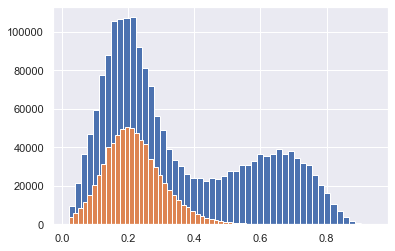

In [25]:
nnt3 = plt.hist(NNt3, bins = 50)
nnd3 = plt.hist(NNd3, bins = 50)

0.018379999999999997
0.014119999999999997


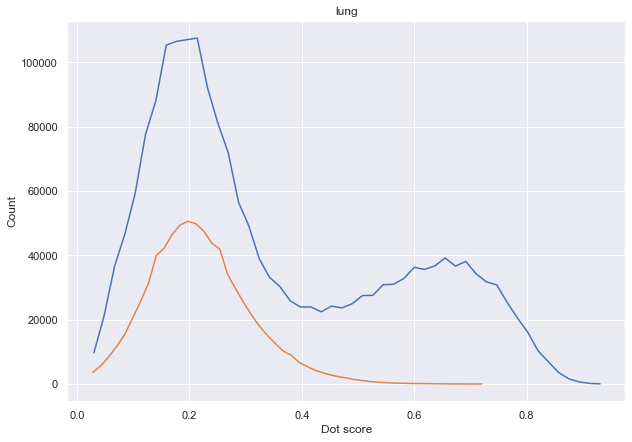

In [26]:
print(nnt3[1][1] - nnt3[1][0])
print(nnd3[1][1] - nnd3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('lung')
plt.plot(nnt3[1][:-1] + 0.009, nnt3[0])
plt.plot(nnd3[1][:-1] + 0.007, nnd3[0])
plt.show()

In [27]:
print(len(NNt3))
print(len(NNd3))

1942999
741095


In [28]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ', score)
    
    nnt = 0
    nnd = 0
    
    for j in NNt3:
        if j >= score:
            nnt += 1
    print('nnt: ', nnt)
    
    for k in NNd3:
        if k >= score:
            nnd += 1
    print('nnd: ', nnd)
    
    print('FDR: ', nnd / nnt)
    print("\n")
    
    if (nnd / nnt) <= 0.01:
        print(nnt)
        print(nnd)
        print(nnd / nnt)
        print(score)
        break
"""
결과
score:  0.4830000000000004
nnt:  575306
nnd:  5705
FDR:  0.009916461848129518
"""

score:  0.001
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.002
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.003
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.004
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.005
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.006
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.007
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.008
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.009000000000000001
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.010000000000000002
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.011000000000000003
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.012000000000000004
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.013000000000000005
nnt:  1942999
nnd:  741095
FDR:  0.38141810675147025


score:  0.014000000000000005

nnt:  1803789
nnd:  680824
FDR:  0.37744104216180496


score:  0.10300000000000008
nnt:  1800591
nnd:  679272
FDR:  0.3772494697574296


score:  0.10400000000000008
nnt:  1797259
nnd:  677626
FDR:  0.37703302640298364


score:  0.10500000000000008
nnt:  1793877
nnd:  676003
FDR:  0.37683910323840486


score:  0.10600000000000008
nnt:  1790495
nnd:  674336
FDR:  0.37661987327526747


score:  0.10700000000000008
nnt:  1787067
nnd:  672660
FDR:  0.37640446608884837


score:  0.10800000000000008
nnt:  1783512
nnd:  670975
FDR:  0.37620997223455743


score:  0.10900000000000008
nnt:  1779970
nnd:  669231
FDR:  0.37597880863160615


score:  0.11000000000000008
nnt:  1776350
nnd:  667498
FDR:  0.3757694148112703


score:  0.11100000000000008
nnt:  1772718
nnd:  665786
FDR:  0.37557355428218137


score:  0.11200000000000009
nnt:  1769092
nnd:  664040
FDR:  0.3753563975191793


score:  0.11300000000000009
nnt:  1765397
nnd:  662146
FDR:  0.37506917707461834


score:  0.11400000000000009
nnt:  1

nnt:  1295918
nnd:  397828
FDR:  0.30698547284627575


score:  0.20300000000000015
nnt:  1290090
nnd:  394180
FDR:  0.3055445744095373


score:  0.20400000000000015
nnt:  1284206
nnd:  390516
FDR:  0.30409139966640863


score:  0.20500000000000015
nnt:  1278252
nnd:  386968
FDR:  0.30273216861776864


score:  0.20600000000000016
nnt:  1272515
nnd:  383438
FDR:  0.30132297065260527


score:  0.20700000000000016
nnt:  1266706
nnd:  379795
FDR:  0.29982884742000115


score:  0.20800000000000016
nnt:  1261013
nnd:  376264
FDR:  0.2983823322995084


score:  0.20900000000000016
nnt:  1255158
nnd:  372690
FDR:  0.2969267614117107


score:  0.21000000000000016
nnt:  1249352
nnd:  369030
FDR:  0.29537712350082285


score:  0.21100000000000016
nnt:  1243554
nnd:  365420
FDR:  0.2938513325517026


score:  0.21200000000000016
nnt:  1237919
nnd:  361768
FDR:  0.29223882984266336


score:  0.21300000000000016
nnt:  1232181
nnd:  358337
FDR:  0.29081522925609143


score:  0.21400000000000016
nnt:  12

nnd:  118539
FDR:  0.1384977760018507


score:  0.3040000000000002
nnt:  853308
nnd:  116864
FDR:  0.13695406582382916


score:  0.3050000000000002
nnt:  850664
nnd:  115267
FDR:  0.1355023840200126


score:  0.3060000000000002
nnt:  848077
nnd:  113614
FDR:  0.1339666091640264


score:  0.3070000000000002
nnt:  845527
nnd:  112035
FDR:  0.13250316075063245


score:  0.3080000000000002
nnt:  842959
nnd:  110451
FDR:  0.13102772495459447


score:  0.3090000000000002
nnt:  840505
nnd:  108803
FDR:  0.12944955711149844


score:  0.3100000000000002
nnt:  837977
nnd:  107271
FDR:  0.128011866674145


score:  0.3110000000000002
nnt:  835506
nnd:  105751
FDR:  0.12657120355808338


score:  0.3120000000000002
nnt:  833063
nnd:  104267
FDR:  0.12516100222912313


score:  0.3130000000000002
nnt:  830711
nnd:  102869
FDR:  0.12383247603558879


score:  0.3140000000000002
nnt:  828294
nnd:  101333
FDR:  0.12233941088550683


score:  0.3150000000000002
nnt:  825938
nnd:  99845
FDR:  0.1208867977983

nnt:  674942
nnd:  24235
FDR:  0.035906789027797946


score:  0.4060000000000003
nnt:  673661
nnd:  23808
FDR:  0.03534121761538816


score:  0.4070000000000003
nnt:  672410
nnd:  23393
FDR:  0.03478978599366458


score:  0.4080000000000003
nnt:  671118
nnd:  22986
FDR:  0.03425031067561889


score:  0.4090000000000003
nnt:  669824
nnd:  22568
FDR:  0.033692432639021594


score:  0.4100000000000003
nnt:  668562
nnd:  22202
FDR:  0.033208587984360466


score:  0.4110000000000003
nnt:  667340
nnd:  21799
FDR:  0.032665507837084544


score:  0.4120000000000003
nnt:  666064
nnd:  21466
FDR:  0.032228134233346944


score:  0.4130000000000003
nnt:  664808
nnd:  21104
FDR:  0.03174450367624938


score:  0.4140000000000003
nnt:  663540
nnd:  20750
FDR:  0.03127166410465081


score:  0.4150000000000003
nnt:  662263
nnd:  20411
FDR:  0.03082008205199445


score:  0.4160000000000003
nnt:  661009
nnd:  20065
FDR:  0.03035510862938326


score:  0.4170000000000003
nnt:  659739
nnd:  19730
FDR:  0.02

'\n결과\nscore:  0.47700000000000037\nnnt:  359824\nnnd:  3563\nFDR:  0.00990206323091289\n'